In [1]:
from google.colab import drive
drive.mount('/content/gdrive') #130
!cp -r '/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)' /content

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/taesungp/contrastive-unpaired-translation CUT
%cd CUT

Cloning into 'CUT'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 256 (delta 9), reused 13 (delta 5), pack-reused 238
Receiving objects: 100% (256/256), 17.90 MiB | 39.17 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/content/CUT


In [ ]:
import glob
uncover_img_dirs = sorted(glob.glob('/content/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/*/IR/uncover/*'))
cover1_img_dirs = sorted(glob.glob('/content/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/*/IR/cover1/*'))
cover2_img_dirs = sorted(glob.glob('/content/In-Bed-Human-Pose-Estimation(VIP-CUP)/train/*/IR/cover2/*'))

import shutil, os
!rm -rf 'datasets/inbed/trainA'
!rm -rf 'datasets/inbed/trainB'
!rm -rf 'datasets/inbed/testA'
!rm -rf 'datasets/inbed/testB'

!mkdir -p 'datasets/inbed/trainA'
!mkdir -p 'datasets/inbed/trainB'
!mkdir -p 'datasets/inbed/testA'
!mkdir -p 'datasets/inbed/testB'

def copy_imgs(img_dirs, target_dir, A_or_B='A', train_test_ratio= 0.8):
  n_images= len(img_dirs)
  n_train= int(n_images*0.8)
  n_test= n_images- n_train

  for i in range(n_images):
    img_dir= img_dirs[i]
    img_name= (6-len(str(i+1)))*'0'+str(i+1)+'.jpg'
    if i<n_train:target_img_dir= f'{target_dir}/train{A_or_B}/{img_name}'
    else:target_img_dir= f'{target_dir}/test{A_or_B}/{img_name}'
    
    print(target_img_dir)
    shutil.copyfile(img_dir, target_img_dir)

copy_imgs(cover1_img_dirs, 'datasets/inbed', 'A', 0.8)
copy_imgs(uncover_img_dirs, 'datasets/inbed', 'B', 0.2)

In [4]:
%%capture
!pip install -r requirements.txt
!pip install torch==1.2.0 torchvision==0.4.0

In [ ]:
!cp -r '/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)/CUT_unpaired/checkpoints' .

In [27]:
!rm -rf './results_FastCUT/'
!rm -rf './results_CUT/'

!python test.py --dataroot ./datasets/inbed --name InbedPose_FastCUT --CUT_mode FastCUT --phase test --results_dir './results_FastCUT/'
!python test.py --dataroot ./datasets/inbed --name InbedPose_CUT --CUT_mode CUT --phase test --results_dir './results_CUT/'

----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/inbed              	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: latest                        
                     eval: False                         
        flip_equivariance: True                          
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 3                      

In [32]:
def show_imgs(type_='CUT', n_imgs= 5):
    fakeB_img_dirs = sorted(glob.glob(f'./results_{type_}/InbedPose_{type_}/test_latest/images/fake_B/*.png'))
    realA_img_dirs = sorted(glob.glob(f'./results_{type_}/InbedPose_{type_}/test_latest/images/real_A/*.png'))

    import matplotlib.pyplot as plt
    for i in range(len(fakeB_img_dirs)):
        if i>=n_imgs:break
        fakeB=plt.imread(fakeB_img_dirs[i])
        realA=plt.imread(realA_img_dirs[i])

        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(realA, label= 'realA')
        plt.subplot(1,2,2)
        plt.imshow(fakeB, label= 'fakeB')
        plt.show()

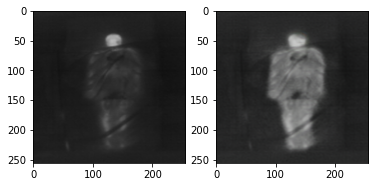

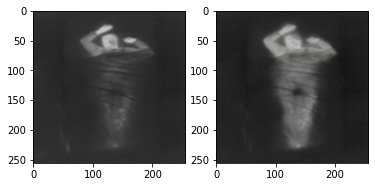

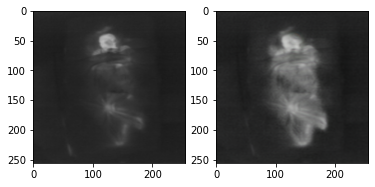

In [33]:
show_imgs(type_= 'CUT', n_imgs= 3)

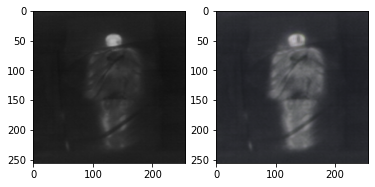

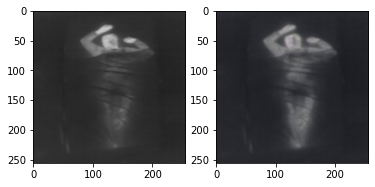

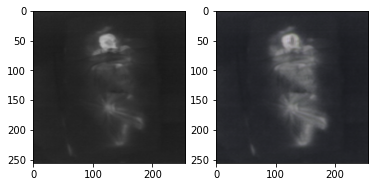

In [34]:
show_imgs(type_= 'FastCUT', n_imgs= 3)